<div style="border: 2px solid #e74c3c; padding: 10px; border-radius: 5px; text-align: center; background-color: #fdecea; color: #c0392b; font-weight: bold;">
  La descente de Gradient
</div>

# Estimation des Moindres Carrés
L'estimation des moindres carrés est l'un des algorithmes fondamentaux de l'apprentissage automatique. Étant donné une matrice $A$ de dimensions $n \times d$ et un vecteur $b$ de dimensions $n \times 1$, l'objectif est de trouver un vecteur $x \in \mathbb{R}^d$ qui minimise la fonction objectif $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

Dans cet exercice, nous allons essayer de déterminer $x$ en utilisant l'estimation des moindres carrés.

On peut voir que la fonction est $L$-smooth avec $L = \frac1n\|A^T A\| = \frac1n\|A\|^2$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from ipywidgets import IntSlider, interact
%load_ext autoreload
%autoreload 2

In [2]:
# Custom libriaires
from utils import (
    load_data,
    standardize,
    build_model_data,
    prediction,
    base_visualization,
    grid_visualization,
    gradient_descent_visualization,
    grid_search, 
    generate_w, 
    get_best_parameters
)

## Chargement de la donnée

In [3]:
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

## Calcul de la fonction objective

In [4]:
def calculate_objective(Axmb):
    """Calculate the mean squared error for vector Axmb = Ax - b."""
    return 1/2*np.mean(Axmb**2)

## Calcul de la constante L

In [5]:
def calculate_L( A):
    """Calculate the smoothness constant for f.
    L = 1/n ||A||2 
    
    """
    eig = np.linalg.eigvals(A.T.dot(A))
    L = max(eig)/(A.shape[0])           
    return L

## La descente de gradient

# Algorithme de Descente de Gradient

La descente de gradient est une méthode d'optimisation utilisée pour minimiser une fonction objectif `f(x)`, où `x ∈ R^d`. Elle repose sur l'utilisation du gradient pour ajuster progressivement les valeurs de `x` afin de réduire `f(x)`.

---

## **Algorithme : Descente de Gradient**

**Entrées** :
- Une fonction objective différentiable `f(x)`,
- Un point initial `x_0 ∈ R^d`,
- Un pas d'apprentissage `η > 0` (appelé taux d'apprentissage),
- Un nombre maximal d'itérations `T`,
- (Optionnel) Une condition d'arrêt basée sur la norme du gradient.

---

### Étapes de l'algorithme :
1. Initialiser `x_0`.
2. **Pour** `t = 0, 1, ..., T-1` :
   - Calculer le gradient `g_t = ∇f(x_t)`,
   - Mettre à jour `x` en suivant la règle :
     ```
     x_{t+1} = x_t - η * g_t
     ```
   - **Optionnel** : Arrêter si `||g_t|| ≤ ε`, où `ε > 0` est un seuil de tolérance.
3. Retourner `x_T` comme solution approchée.

---

## **Détails Importants :**

### 1. **Choix du pas d'apprentissage `η`**
Le pas d'apprentissage `η` contrôle la vitesse de convergence :
- Si `η` est trop petit : la convergence est lente.
- Si `η` est trop grand : on risque de diverger.

### 2. **Condition d'arrêt**
Pour garantir que l'algorithme ne tourne pas indéfiniment, on peut utiliser plusieurs critères :
- Un nombre maximal d'itérations `T`,
- La norme du gradient `||g_t|| ≤ ε`,
- La variation de `f(x)` : arrêter si `|f(x_{t+1}) - f(x_t)|` est très petit.

### 3. **Convergence**
Sous certaines conditions (par exemple, si `f(x)` est convexe et `L`-lisse), la descente de gradient converge vers un minimum global. Sinon, elle converge généralement vers un minimum local.

---

## **Pseudo-code :**

```plaintext
Entrées : f(x), x_0, η, T, ε
Initialiser : x ← x_0
Pour t = 0, 1, ..., T-1 :
    g ← ∇f(x)        # Calculer le gradient
    Si ||g|| ≤ ε :
        Arrêter
    x ← x - η * g     # Mettre à jour x
Retourner x


In [6]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    Axmb = A.dot(x) - b
    grad = A.T.dot(Axmb) / len(Axmb)
    return grad, Axmb

In [7]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective, gradient
        grad, Axmb = compute_gradient(b, A, x)
        obj = calculate_objective(Axmb)
        # update x by a gradient descent step
        x = x - gamma * grad
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

## Application

In [14]:


# Define the parameters of the algorithm.
max_iters =1000

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/999): objective=2792.2367127591674
Gradient Descent(1/999): objective=2264.6350560300034
Gradient Descent(2/999): objective=1837.27771407938
Gradient Descent(3/999): objective=1491.118267099376
Gradient Descent(4/999): objective=1210.7291150455724
Gradient Descent(5/999): objective=983.6139018819913
Gradient Descent(6/999): objective=799.6505792194906
Gradient Descent(7/999): objective=650.640287862865
Gradient Descent(8/999): objective=529.9419518639982
Gradient Descent(9/999): objective=432.1762997049161
Gradient Descent(10/999): objective=352.9861214560597
Gradient Descent(11/999): objective=288.842077074486
Gradient Descent(12/999): objective=236.88540112541122
Gradient Descent(13/999): objective=194.80049360666067
Gradient Descent(14/999): objective=160.71171851647276
Gradient Descent(15/999): objective=133.09981069342058
Gradient Descent(16/999): objective=110.73416535674829
Gradient Descent(17/999): objective=92.61799263404369
Gradient Descent(18/999): objecti

In [9]:


def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives_naive, gradient_xs_naive, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)



In [10]:
interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)));

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

In [11]:
# Define the parameters of the algorithm.
max_iters = 50

L = calculate_L(A)
gamma = 1/L

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=2792.2367127591674
Gradient Descent(1/49): objective=15.3858878688294
Gradient Descent(2/49): objective=15.3858878688294
Gradient Descent(3/49): objective=15.3858878688294
Gradient Descent(4/49): objective=15.3858878688294
Gradient Descent(5/49): objective=15.3858878688294
Gradient Descent(6/49): objective=15.3858878688294
Gradient Descent(7/49): objective=15.3858878688294
Gradient Descent(8/49): objective=15.3858878688294
Gradient Descent(9/49): objective=15.3858878688294
Gradient Descent(10/49): objective=15.3858878688294
Gradient Descent(11/49): objective=15.3858878688294
Gradient Descent(12/49): objective=15.3858878688294
Gradient Descent(13/49): objective=15.3858878688294
Gradient Descent(14/49): objective=15.3858878688294
Gradient Descent(15/49): objective=15.3858878688294
Gradient Descent(16/49): objective=15.3858878688294
Gradient Descent(17/49): objective=15.3858878688294
Gradient Descent(18/49): objective=15.3858878688294
Gradient Descent(19/

Avec le bon taux d'apprentissage, l'algorithme converge plus rapidement.

In [12]:
interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)));

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

## Faisons le test sur des données plus concrètes

In [15]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

## Supposons des gradients bornés
Supposons que nous évoluons dans une région bornée $\|x\| \leq 25$ contenant toutes les itérations (et nous supposons également, pour simplifier, que $\|x - x^\star\| \leq 25$). Alors, d'après $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, on peut voir que $f$ est Lipschitzienne sur cette région bornée, avec une constante de Lipschitz $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$.


In [16]:
grad_norm_bound = (25*np.linalg.norm(np.dot(A.T,A)) + np.linalg.norm(np.dot(A.T,b)))/A.shape[0]
grad_norm_bound

98.66209327259453

In [21]:
max_iters = 1000
gamma = 25/(grad_norm_bound*np.sqrt(max_iters))

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_gradient_objectives, bd_gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_gradient_objectives_averaged = []
for i in range(len(bd_gradient_xs)):
    if i > 0:
        bd_gradient_xs[i] = (i * bd_gradient_xs[i-1] + bd_gradient_xs[i])/(i + 1)
    grad, err = compute_gradient(b, A, bd_gradient_xs[i])
    obj = calculate_objective(err)
    bd_gradient_objectives_averaged.append(obj)

Gradient Descent(0/999): objective=780.8686016504854
Gradient Descent(1/999): objective=779.4046708822854
Gradient Descent(2/999): objective=777.9686957711853
Gradient Descent(3/999): objective=776.5601166746613
Gradient Descent(4/999): objective=775.1783855549787
Gradient Descent(5/999): objective=773.8229657306662
Gradient Descent(6/999): objective=772.4933316334993
Gradient Descent(7/999): objective=771.1889685708665
Gradient Descent(8/999): objective=769.9093724933905
Gradient Descent(9/999): objective=768.6540497676881
Gradient Descent(10/999): objective=767.4225169541456
Gradient Descent(11/999): objective=766.2143005895992
Gradient Descent(12/999): objective=765.028936974804
Gradient Descent(13/999): objective=763.8659719665836
Gradient Descent(14/999): objective=762.7249607745531
Gradient Descent(15/999): objective=761.6054677623108
Gradient Descent(16/999): objective=760.5070662529954
Gradient Descent(17/999): objective=759.429338339111
Gradient Descent(18/999): objective=758.

### Descente de gradient avec la constante smooth L

In [22]:
max_iters = 1000
L = calculate_L( A)
gamma = 1/L

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/999): objective=780.8686016504854
Gradient Descent(1/999): objective=721.5052560260677
Gradient Descent(2/999): objective=706.7843584315374
Gradient Descent(3/999): objective=702.1659603718193
Gradient Descent(4/999): objective=700.3195706210596
Gradient Descent(5/999): objective=699.3927282552014
Gradient Descent(6/999): objective=698.8265138747603
Gradient Descent(7/999): objective=698.4252460378514
Gradient Descent(8/999): objective=698.1121802865196
Gradient Descent(9/999): objective=697.8540419775695
Gradient Descent(10/999): objective=697.6346924802035
Gradient Descent(11/999): objective=697.4451956987403
Gradient Descent(12/999): objective=697.2798771098778
Gradient Descent(13/999): objective=697.134694345026
Gradient Descent(14/999): objective=697.0065306304226
Gradient Descent(15/999): objective=696.8928669366339
Gradient Descent(16/999): objective=696.7916143488984
Gradient Descent(17/999): objective=696.7010172175321
Gradient Descent(18/999): objective=696

## Visualisons l'évolution des fonctions objectives

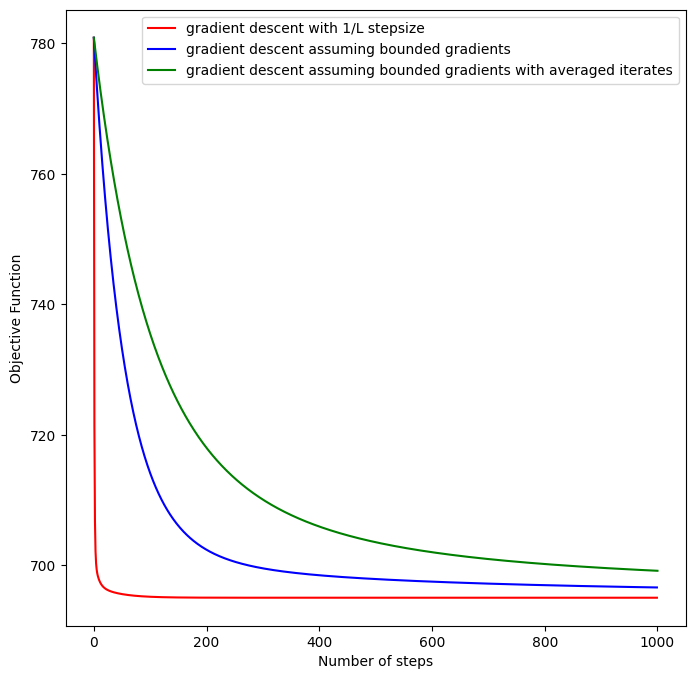

In [23]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_gradient_objectives)), bd_gradient_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_gradient_objectives_averaged)), bd_gradient_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
plt.legend(loc='upper right')
plt.show()